In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
print(f"TensorFlow: {tf.__version__}")

TensorFlow: 2.17.0


In [19]:
input_shape = (64, 64, 3)
batch_size = 32
epochs = 30
target_size = (64, 64)
class_names = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
) 

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
training_set = train_datagen.flow_from_directory(
    'training_set',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4317 images belonging to 5 classes.


In [45]:
test_set = test_datagen.flow_from_directory(
    'test_set',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 165 images belonging to 5 classes.


In [46]:
def get_images_from_flow(flow, num_images):
    images, labels = next(flow)
    return images[:num_images], labels[:num_images]

In [47]:
def plot_images(images, labels, class_names, num_rows, num_cols):
    plt.figure(figsize=(12, 6))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

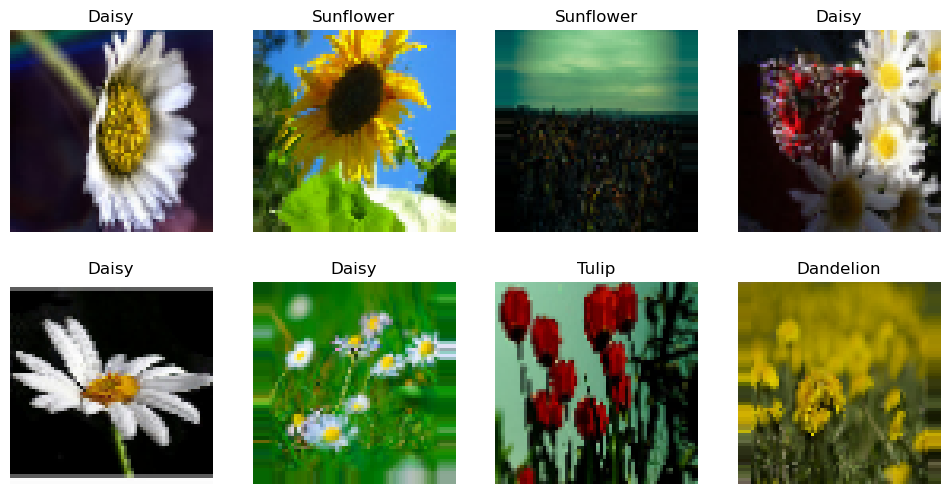

In [48]:
num_images = 8
images, labels = get_images_from_flow(training_set, num_images)
plot_images(images, labels, class_names, num_rows=2, num_cols=4)

In [27]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [28]:
#Thiết lập các thông số như thuật toán tối ưu hóa RMSprop, 
#hàm mất mát, chỉ số đánh giá acc
cnn.compile(optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [29]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,741 (2.61 MB)

 Trainable params: 684,293 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [30]:
# Thêm EarlyStopping và ModelCheckpoint để tối ưu hóa quá trình huấn luyện
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras',monitor='val_accuracy',
                                   save_best_only=True)

In [49]:
History = cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint]
)
print("Huấn luyện mô hình đã hoàn tất và được lưu thành công.")

Epoch 1/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 49s 358ms/step - accuracy: 0.7338 - loss: 0.6936 - val_accuracy: 0.7212 - val_loss: 0.6439
Epoch 2/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 49s 355ms/step - accuracy: 0.7279 - loss: 0.7104 - val_accuracy: 0.5333 - val_loss: 2.1421
Epoch 3/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 358ms/step - accuracy: 0.7365 - loss: 0.6710 - val_accuracy: 0.7333 - val_loss: 0.7966
Epoch 4/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 359ms/step - accuracy: 0.7436 - loss: 0.6559 - val_accuracy: 0.8545 - val_loss: 0.4582
Epoch 5/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 53s 384ms/step - accuracy: 0.7632 - loss: 0.6490 - val_accuracy: 0.6909 - val_loss: 0.8175
Epoch 6/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 56s 405ms/step - accuracy: 0.7553 - loss: 0.6305 - val_accuracy: 0.8000 - val_loss: 0.5214
Epoch 7/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 49s 359ms/step - accuracy: 0.7861 - loss: 0.5957 - val_accuracy: 0.7939 - val_loss: 0.5328
Epoch 8/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 365ms/step - accuracy: 0.8025 - loss: 0

In [50]:
#Luu model
cnn.save('new_model.keras')
print("Lưu thành công.")

Lưu thành công.


In [51]:
# Đánh giá mô hình trên tập dữ liệu kiểm tra
loaded_model = tf.keras.models.load_model('new_model.keras')
test_loss, test_accuracy = loaded_model.evaluate(test_set)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.8568 - loss: 0.4708
Test Accuracy: 85.45%


In [34]:
def get_predictions_from_model(cnn, data_generator, num_images):
   
    images, labels = next(data_generator)
    predictions = cnn.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)
    return images[:num_images], true_classes[:num_images], predicted_classes[:num_images]

In [42]:
def plot_predictions(images, true_classes, predicted_classes, class_names, num_rows, num_cols):

    plt.figure(figsize=(12, 6))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        
        # Kiểm tra và chuẩn hóa ảnh
        img = images[i]
        if img.max() > 1:  # [0, 1] chuẩn hóa ảnh
            img = img / 255.0
        
        plt.imshow(img)
        true_label = class_names[true_classes[i]]
        predicted_label = class_names[predicted_classes[i]]
        plt.title(f'Gốc: {true_label}\nDự đoán: {predicted_label}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


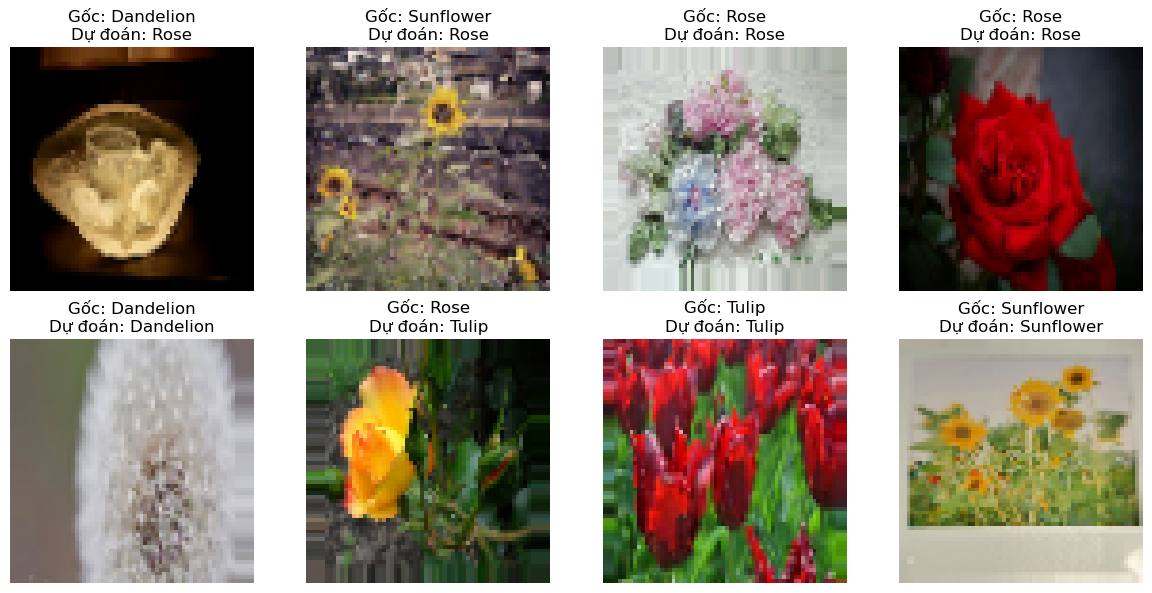

In [43]:
# Đã huấn luyện mô hình và đã có `cnn`
num_images = 8 
images, true_classes, predicted_classes = get_predictions_from_model(
    cnn, training_set, num_images)

# Vẽ ảnh với dự đoán
plot_predictions( images,  true_classes, 
                 predicted_classes, class_names, 
                 num_rows=2, num_cols=4)

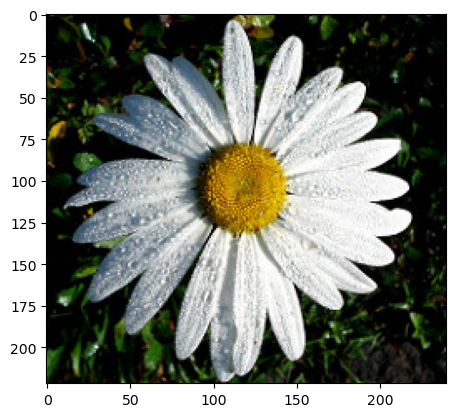

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Kết quả dự đoán: [[9.9998772e-01 7.9373040e-06 4.2117990e-06 5.2440359e-09 7.4834524e-08]]
Loại hoa được dự đoán: Daisy


In [39]:
# Dự đoán cho một ảnh cụ thể
test_image_path = 'prediction_set/daisy.jpg'
test_image = Image.open(test_image_path)
plt.imshow(test_image)
plt.show()

# Thay đổi kích thước ảnh và chuẩn hóa
test_image_resized = test_image.resize(target_size)
test_image_array = np.expand_dims(np.array(test_image_resized) / 255.0, axis=0)

# Dự đoán kết quả
result = loaded_model.predict(test_image_array)
predicted_flower_name = class_names[np.argmax(result, axis=1)[0]]

print("Kết quả dự đoán:", result)
print("Loại hoa được dự đoán:", predicted_flower_name)

In [52]:
# Lớp của kết quả dự đoán
predicted_class_index = np.argmax(result[0])
predicted_class = class_names[predicted_class_index]
print(f'Dự đoán lớp: {predicted_class}')

Dự đoán lớp: Daisy


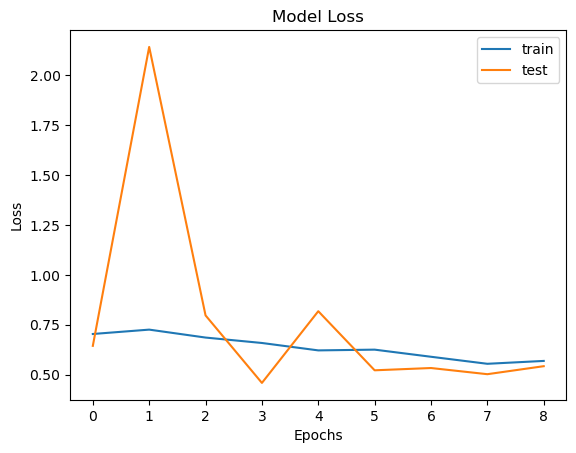

In [53]:
#Đánh giá hiệu suất
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

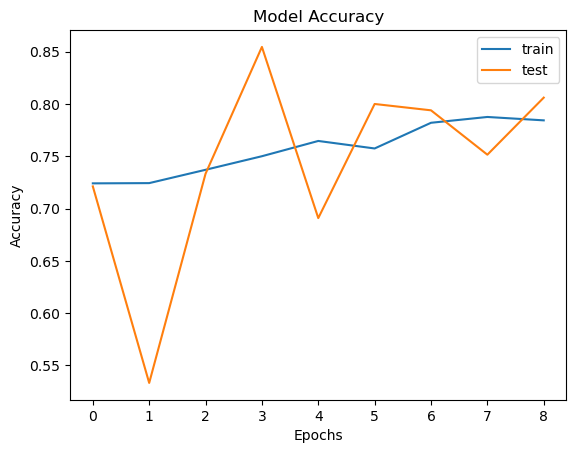

In [54]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()